In [69]:
%matplotlib inline

import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt

from scipy.special import erf, erfc
from astropy.stats import median_absolute_deviation as mad

from utils import *

0.0027065298387201437
5.733009127920804e-07
0.9999999999974404 0.9999994266968563


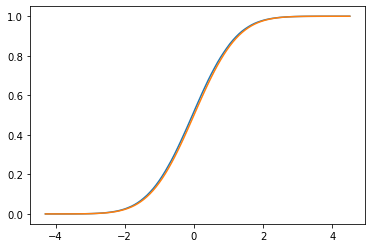

In [63]:
num_tries = 100000
delta_P_obs = 1. # Pa
st = 1. # Pa

rand_FP = normal(scale=st, size=num_tries)
# rand_FP = (rand_FP - np.mean(rand_FP))/np.std(rand_FP)

hst, bin_edges = np.histogram(rand_FP, bins=100)
bins = 0.5*(bin_edges[1:] + bin_edges[0:-1])
hst = hst/num_tries
cum_sum = np.cumsum(hst)
plt.plot(bins, cum_sum)
plt.plot(bins, 0.5*(1 + erf(bins/np.sqrt(2.))))

print((erf(5./np.sqrt(2.)) - erf(3./np.sqrt(2.)))/erf(3./np.sqrt(2.)))
print((erf(7./np.sqrt(2.)) - erf(5./np.sqrt(2.)))/erf(5./np.sqrt(2.)))
print(erf(7./np.sqrt(2.)), erf(5./np.sqrt(2.)))

10.0
[0.98543147 0.17462864]


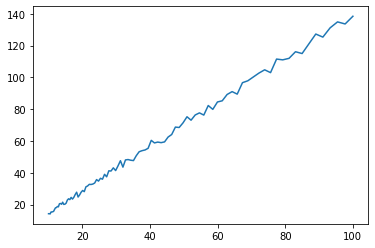

In [107]:
delta_P = 1. # Pa
fwhm = 10. # seconds
num_fwhm = 200

lorentzian_fwhm = 1.
lorentzian_depth = 1./np.pi

delta_t = 1. # seconds
time = np.arange(-num_fwhm*fwhm, num_fwhm*fwhm + delta_t, delta_t)
profile = modified_lorentzian(time, 0., 0., 0., delta_P, fwhm)

sts = 10**(np.linspace(-2, np.log10(1./10), 100))*delta_P
convs = np.zeros_like(sts)

for i in range(len(sts)):
    
    noisy_profile = profile + normal(scale=sts[i], size=len(time))

    convolution = apply_lorentzian_matched_filter(time, noisy_profile, st, lorentzian_fwhm, lorentzian_depth)
    convolution -= np.median(convolution)
    convolution /= mad(convolution)

    convs[i] = np.max(convolution)

plt.plot(delta_P/sts, convs)
print(np.min(delta_P/sts))

coeffs = np.polyfit(np.log10(delta_P/sts), np.log10(convs), 1)
print(coeffs)